In [1]:
import pylineament as ln
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import glob

# performace Assessment for Lineament Extraction
This section exhibits lineament extraction will work on different image size.

Pylineamnet use paralel computing for lineament extraction, that will make computation more efficient.


There are three different scenario: 
- single core (use `ln.dem_to_shp_small` function)
- multicores (2 cores using `ln.dem_to_shp` function)
- multicores (4 cores using `ln.dem_to_shp` function)

in conclusion, the use of parallel computing may be able to **increase performace more than 20 times**.

In [ ]:
flist = glob.glob('benchmark_data/*')


elapsed_collection = []
img_size           = []

for fname in flist: 
    _,dem,_,_ = ln.read_raster(fname)
    nPixels   = dem.shape[0] * dem.shape[1]
    start_time = time.perf_counter()
    # ln.dem_to_shp_small function specificaly used for small image
    # this function extract lineamnet using single core
    ln.dem_to_shp_small(fname, save_to_file=True, shp_name=f'benchmark_shp/1core_{dem.shape[0]}')
    end_time = time.perf_counter()
    elapsed = end_time - start_time

    img_size.append(nPixels)
    elapsed_collection.append(elapsed)

    print(f'elapsed time = {elapsed} second; nPixels = {nPixels} pixels')


benchmark_data\00500.tiff
elapsed time = 16.629492899999605 second; nPixels = 250000 pixels
benchmark_data\01000.tiff
elapsed time = 44.48017710000204 second; nPixels = 1000000 pixels
benchmark_data\01500.tiff
elapsed time = 107.21041530000002 second; nPixels = 2250000 pixels
benchmark_data\02000.tiff
elapsed time = 245.87418379999872 second; nPixels = 4000000 pixels
benchmark_data\02500.tiff
elapsed time = 761.4053585000001 second; nPixels = 6250000 pixels
benchmark_data\03000.tiff
elapsed time = 1576.8913334999997 second; nPixels = 9000000 pixels


In [ ]:

n_core = 2


for fname in flist: 
    _,dem,_,_ = ln.read_raster(fname)
    nPixels   = dem.shape[0] * dem.shape[1]
    start_time = time.perf_counter()
    # ln.dem_to_shp function  used for large image, it extract lineamnet using multi core. 
    # n_job determine number of core being used. 
    # by default pylineamnet will use all availabel core in your computer
    ln.dem_to_shp(fname, save_to_file=False, n_job = n_core, shp_name=f'benchmark_shp/2core_{dem.shape[0]}')
    end_time = time.perf_counter()
    elapsed = end_time - start_time

    img_size.append(nPixels)
    elapsed_collection.append(elapsed)

    print(f'elapsed time = {elapsed} second; nPixels = {nPixels} pixels')


elapsed time = 15.72116829999868 second; nPixels = 250000 pixels
elapsed time = 26.841302100001485 second; nPixels = 1000000 pixels
elapsed time = 48.74249710000004 second; nPixels = 2250000 pixels
elapsed time = 89.77412679999907 second; nPixels = 4000000 pixels
elapsed time = 144.41173290000006 second; nPixels = 6250000 pixels
elapsed time = 221.60303529999874 second; nPixels = 9000000 pixels


In [ ]:

n_core = 4


for fname in flist: 
    _,dem,_,_ = ln.read_raster(fname)
    nPixels   = dem.shape[0] * dem.shape[1]
    start_time = time.perf_counter()
    
    # ln.dem_to_shp function  used for large image, it extract lineamnet using multi core. 
    # n_job determine number of core being used. 
    # by default pylineamnet will use all availabel core in your computer
    ln.dem_to_shp(fname, save_to_file=False, n_job = n_core, shp_name=f'benchmark_shp/4core_{dem.shape[0]}')
    end_time = time.perf_counter()
    elapsed = end_time - start_time

    img_size.append(nPixels)
    elapsed_collection.append(elapsed)

    print(f'elapsed time = {elapsed} second; nPixels = {nPixels} pixels')


elapsed time = 16.39050270000007 second; nPixels = 250000 pixels
elapsed time = 22.975318299999344 second; nPixels = 1000000 pixels
elapsed time = 39.203095400000166 second; nPixels = 2250000 pixels
elapsed time = 65.2505618000032 second; nPixels = 4000000 pixels
elapsed time = 111.08622040000046 second; nPixels = 6250000 pixels
elapsed time = 159.1284452 second; nPixels = 9000000 pixels


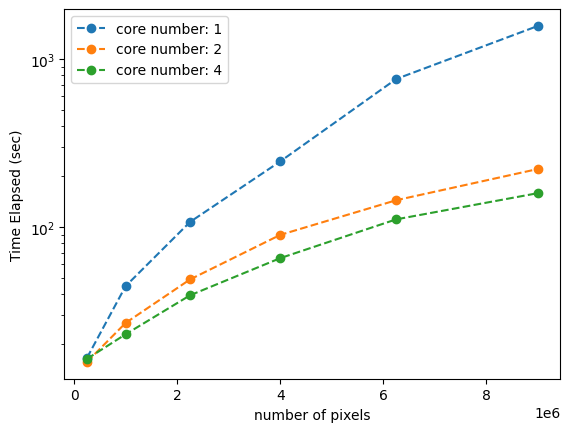

In [ ]:
cores = [1, 2, 4]
for i in range(3):
    plt.plot(img_size[i*6: i*6 + 6], elapsed_collection[i*6: i*6 + 6], '--o', label=f'core number: {cores[i]}')
plt.yscale('log')
plt.xlabel('Number of pixels')
plt.ylabel('Time Elapsed (sec)')
plt.legend()